<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-07 10:55:53.753197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [3]:
epsilon = 0.9

constants_dict = {
    "GRIDSTEP": 0.1,
    "K": 5
}

target_data_dict = {
    "data_name": "Toy",
    "classes": [0, 1],
    "dims": 2,
    "dim_reduction": "12",
    "other": {
            "samples": 10000,
            "weights": [0.9, 0.1],
            "sep": 0.8
        }
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [5]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples=100, calib_size=0.5)
setup_dict.keys()

Data loaded: ./../pickles/Synth2D-2labels-2dims-12-s10000-w0.9:0.1-s0.8.pickle
sample dims: (7000, 2) | (3000, 2)
label dims: (7000,) | (3000,)
train labels: [0 1]
test labels: [0 1]
Start preparing grid: (7000, 2)
90
1
Done preparing grid: (9000, 2)

Train samples: (100, 2)
{0: 0.9, 1: 0.1}
Test samples: (3000, 2)
{0: 0.9, 1: 0.1}
Prop: (50, 2) (50,) 
Calib: (50, 2) (50,)
X_prop: (50, 2)
{0: 0.9, 1: 0.1}
X_calib: (50, 2)
{0: 0.9, 1: 0.1}
[0, 1]


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(50,)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(9000,)


p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(9000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

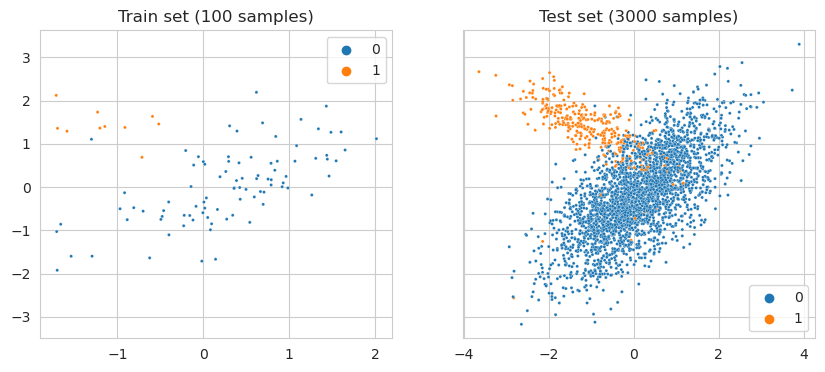

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

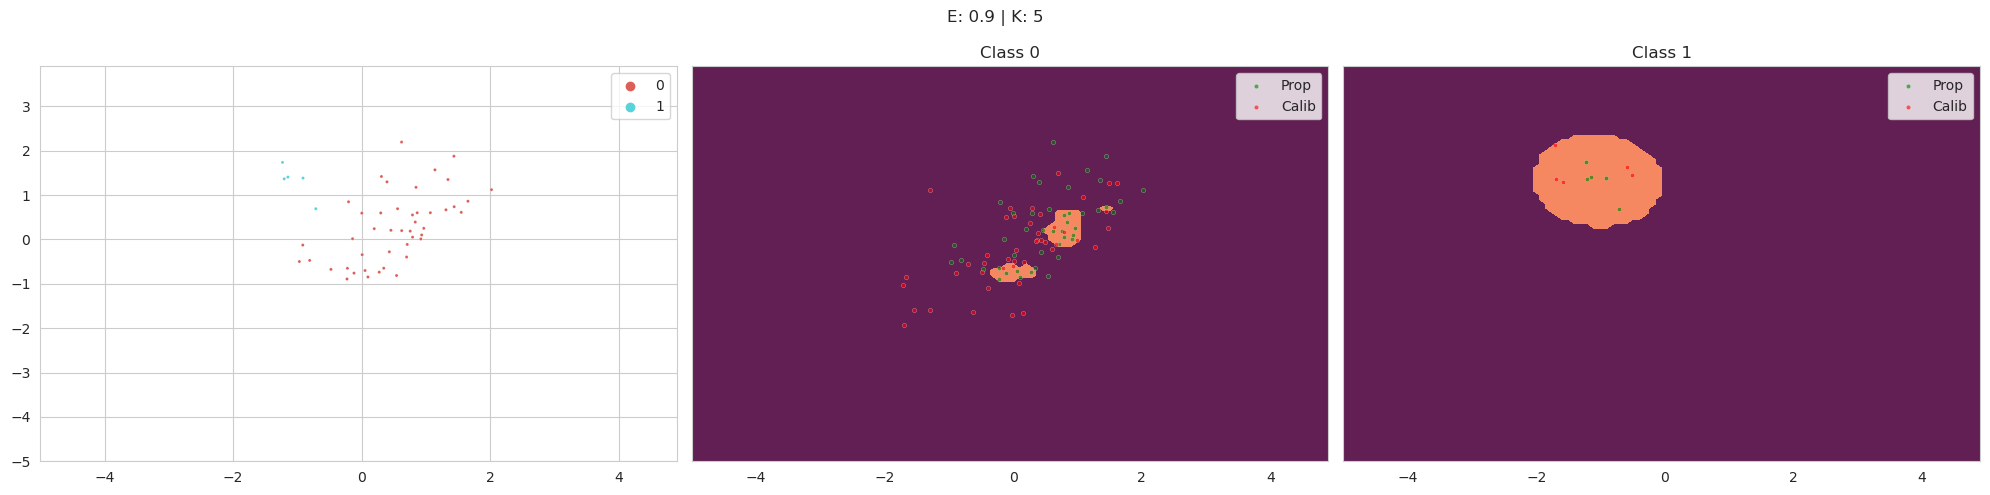

Synthetic samples per class
Label 0: (58, 2)
Label 1: (329, 2)
(58,)
(387,)


2023-11-07 10:56:08.323715: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
94/94 [==============================] - 0s 2ms/step


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2686
           1       0.00      0.00      0.00       314

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.90      0.85      3000



Total synthetic samples: (387, 2)
Total O+S samples: (487, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2686
           1       0.40      0.92      0.56       314

    accuracy                           0.85      3000
   macro avg       0.69      0.88      0.73      3000
weighted avg       0.93      0.85      0.87      3000



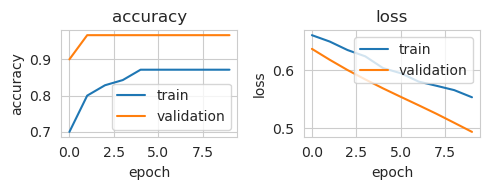

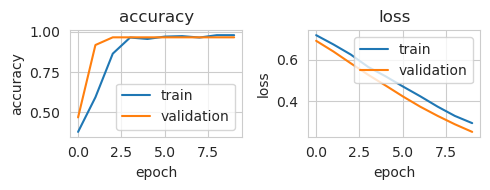

In [7]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=1)

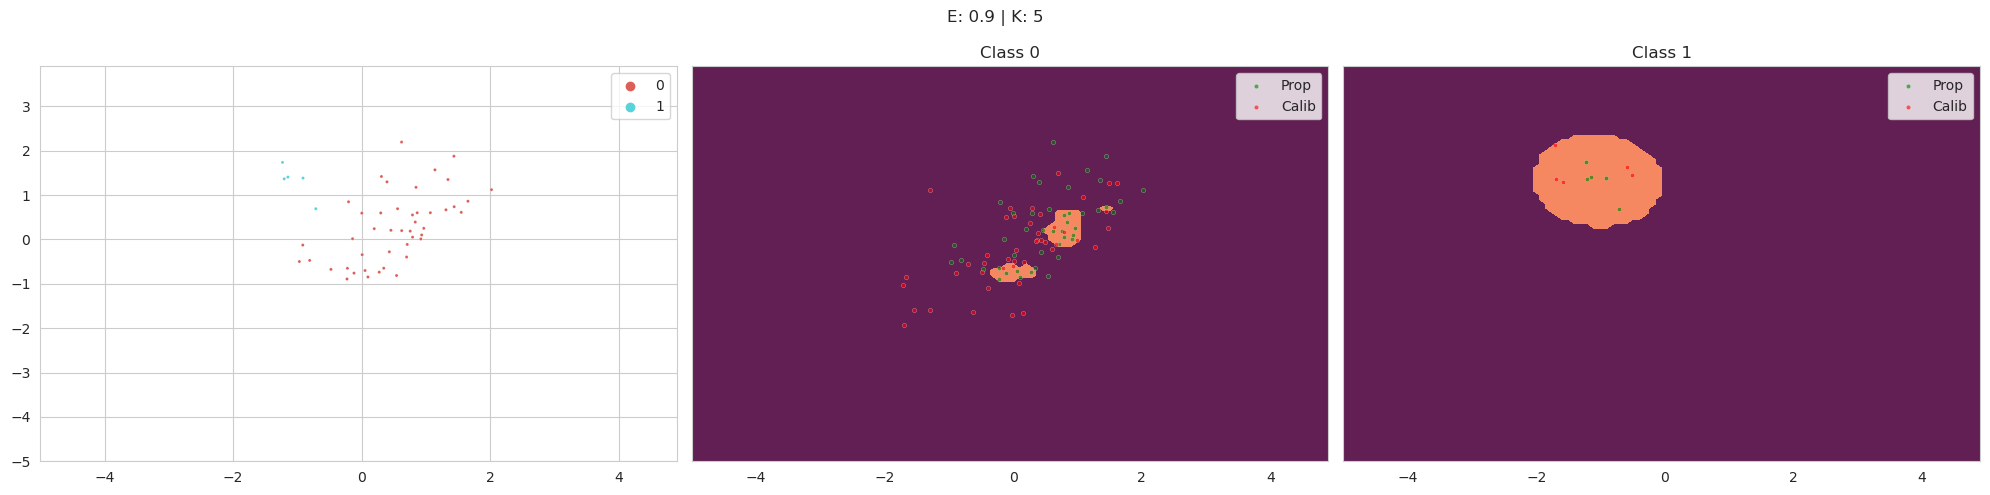

Synthetic samples per class
Label 0: (58, 2)
Label 1: (329, 2)
(58,)
(387,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2686
           1       0.83      0.03      0.06       314

    accuracy                           0.90      3000
   macro avg       0.87      0.52      0.50      3000
weighted avg       0.89      0.90      0.85      3000



Total synthetic samples: (387, 2)
Total O+S samples: (487, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.09      0.17      2686
           1       0.11      0.99      0.20       314

    accuracy                           0.19      3000
   macro avg       0.55      0.54      0.19      3000
weighted avg       0.90      0.19      0.17      3000



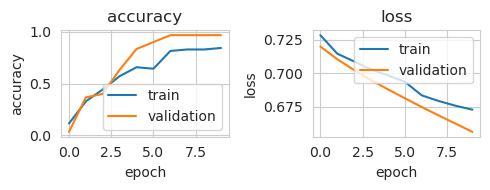

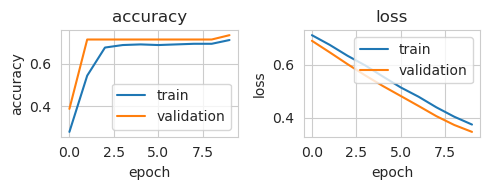

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=12)

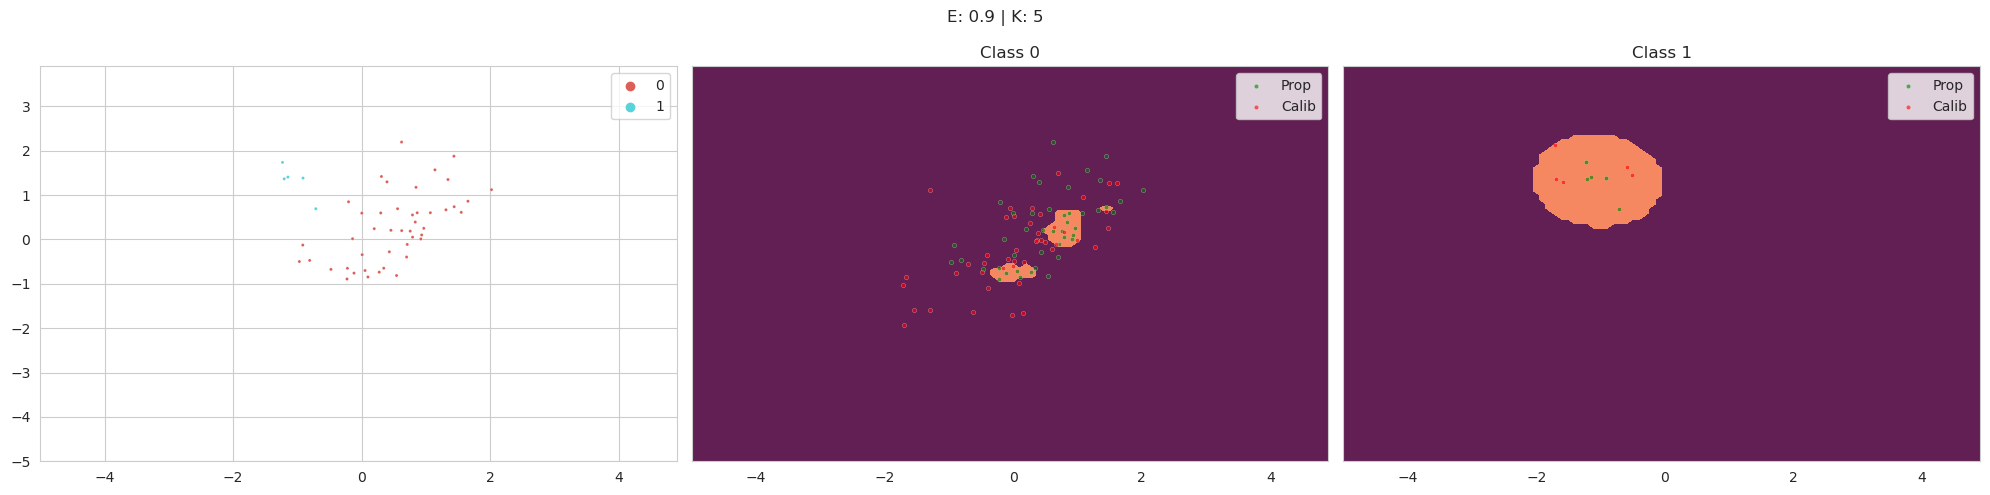

Synthetic samples per class
Label 0: (58, 2)
Label 1: (329, 2)
(58,)
(387,)


Baseline results: ORIGINAL
94/94 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      2686
           1       0.23      0.93      0.37       314

    accuracy                           0.67      3000
   macro avg       0.61      0.79      0.58      3000
weighted avg       0.91      0.67      0.74      3000



Total synthetic samples: (387, 2)
Total O+S samples: (487, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2686
           1       0.23      0.96      0.37       314

    accuracy                           0.65      3000
   macro avg       0.61      0.79      0.56      3000
weighted avg       0.91      0.65      0.72      3000



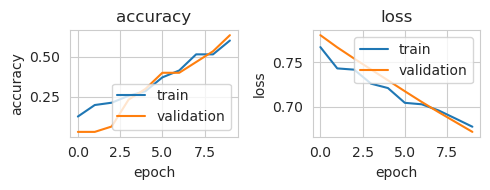

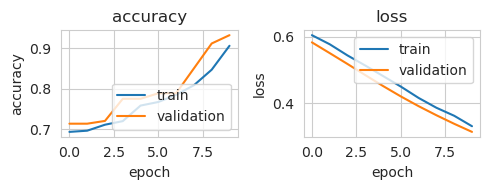

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=42)

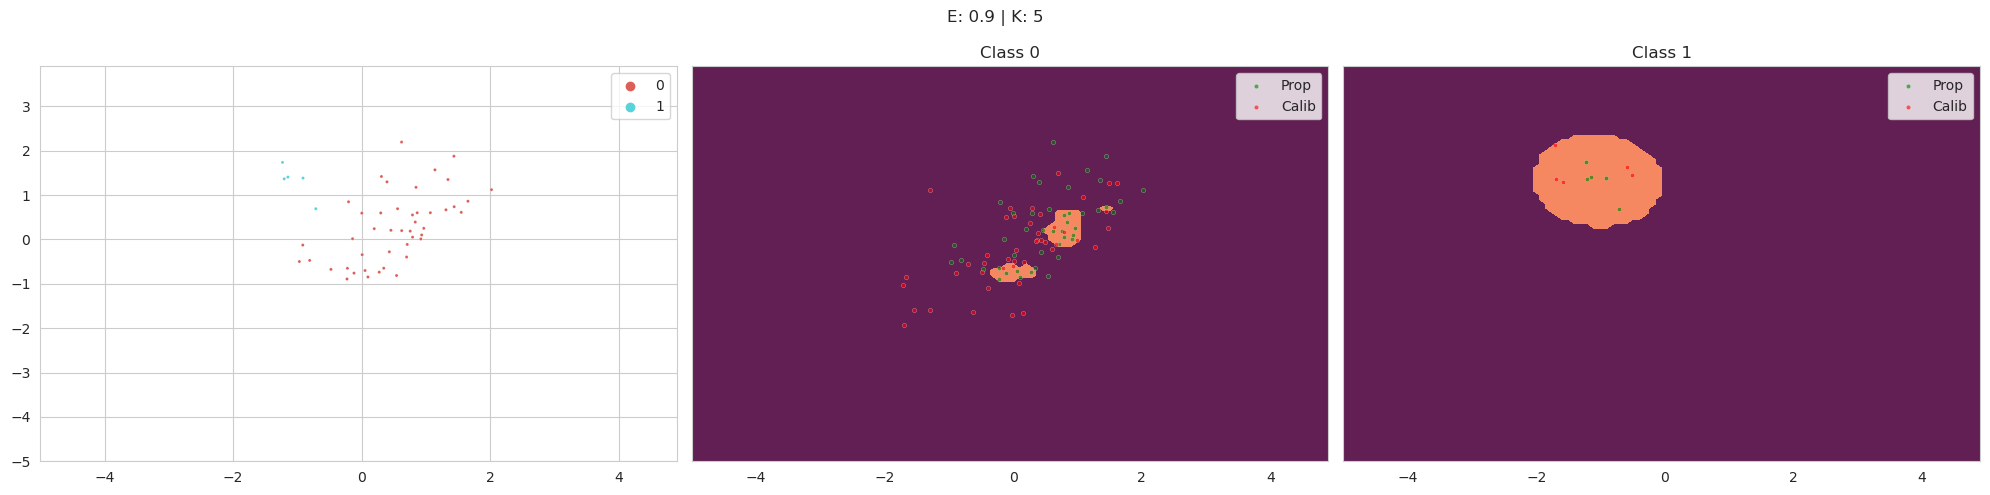

Synthetic samples per class
Label 0: (58, 2)
Label 1: (329, 2)
(58,)
(387,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2686
           1       0.39      0.79      0.52       314

    accuracy                           0.85      3000
   macro avg       0.68      0.82      0.71      3000
weighted avg       0.91      0.85      0.87      3000



Total synthetic samples: (387, 2)
Total O+S samples: (487, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.63      0.77      2686
           1       0.22      0.91      0.36       314

    accuracy                           0.66      3000
   macro avg       0.60      0.77      0.56      3000
weighted avg       0.90      0.66      0.73      3000



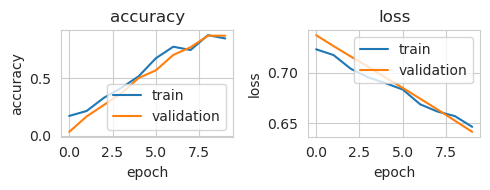

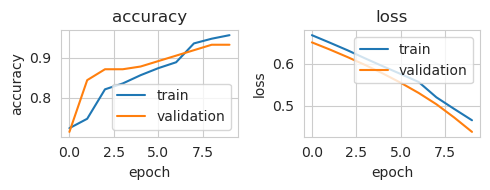

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=50)

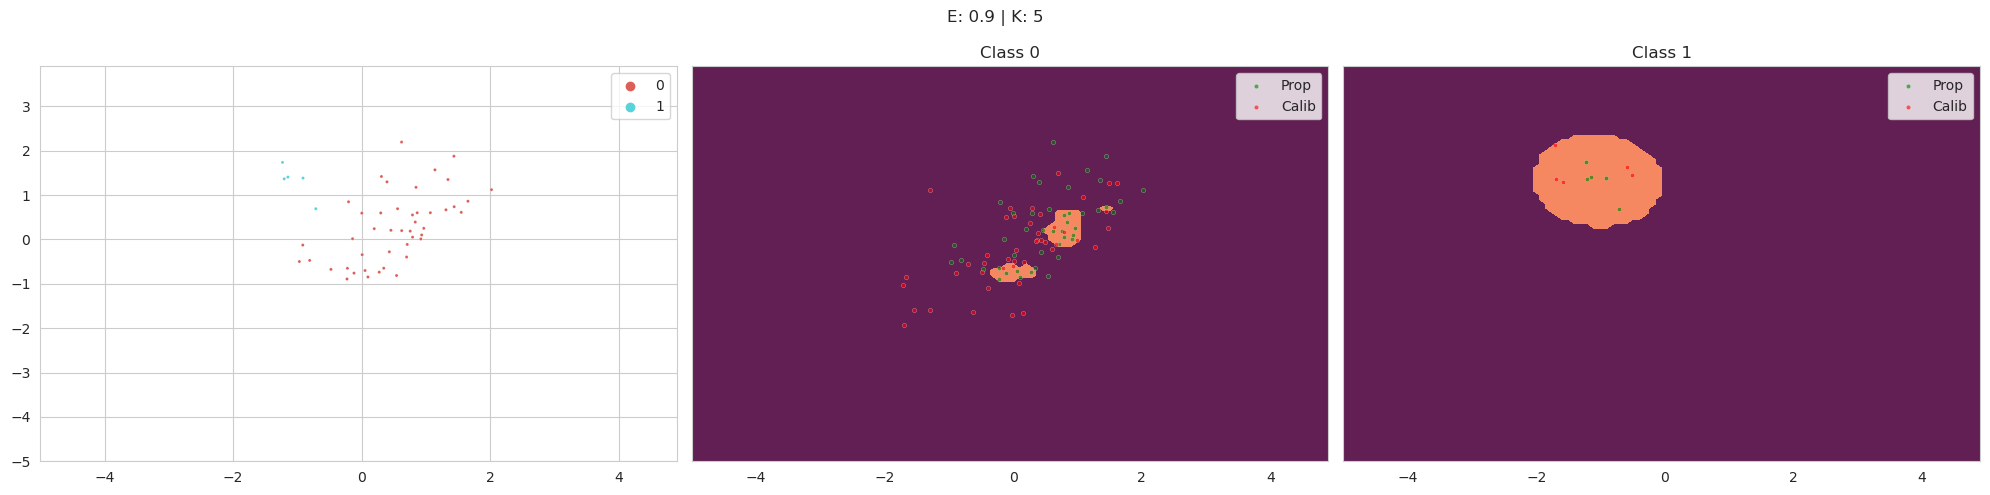

Synthetic samples per class
Label 0: (58, 2)
Label 1: (329, 2)
(58,)
(387,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2686
           1       1.00      0.24      0.39       314

    accuracy                           0.92      3000
   macro avg       0.96      0.62      0.67      3000
weighted avg       0.93      0.92      0.90      3000



Total synthetic samples: (387, 2)
Total O+S samples: (487, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      2686
           1       0.37      0.94      0.53       314

    accuracy                           0.83      3000
   macro avg       0.68      0.88      0.71      3000
weighted avg       0.93      0.83      0.86      3000



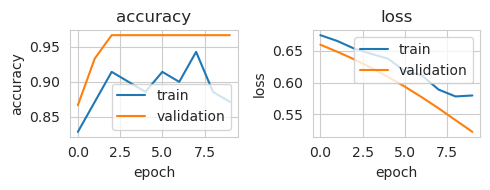

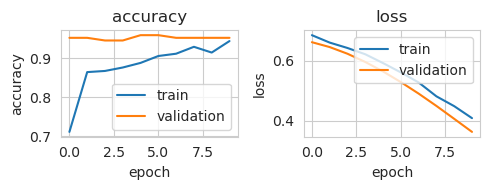

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=100)